## Función para dibujar las soluciones

In [1]:
# Definir función general
def dibujar_sistema(a11, a12, a21, a22, rango=(-3,3), tiempo=10, puntos_iniciales=[(1,1), (-1,1), (1,-1)]):
    var('x y t')
    dx = a11*x + a12*y
    dy = a21*x + a22*y
    f = (dx, dy)
    
    # Campo de vectores
    campo = plot_vector_field(f, (x, rango[0], rango[1]), (y, rango[0], rango[1]), color='blue')
    
    # Trayectorias desde varios puntos
    trayectorias = Graphics()
    for (x0, y0) in puntos_iniciales:
        sol = desolve_system_rk4([dx, dy], [x, y], ics=[0, x0, y0], ivar=t, step=0.1, end_points=tiempo)
        trayectorias += line([(pt[1], pt[2]) for pt in sol], color='red', thickness=2, 
                            xmin=rango[0],xmax=rango[1],ymin=rango[0],ymax=rango[1])
    # Trayectorias desde varios puntos (tiempos negativos)
    for (x0, y0) in puntos_iniciales:
        sol = desolve_system_rk4([-dx, -dy], [x, y], ics=[0, x0, y0], ivar=t, step=0.1, end_points=tiempo)
        trayectorias += line([(pt[1], pt[2]) for pt in sol], color='red', thickness=2, 
                            xmin=rango[0],xmax=rango[1],ymin=rango[0],ymax=rango[1])
    
    return campo + trayectorias

## Punto de silla

In [13]:
A = matrix([[2,2],[-2,-3]])

In [14]:
show(A.eigenvectors_right())

[(1,
  [
  (1, -1/2)
  ],
  1),
 (-2,
  [
  (1, -2)
  ],
  1)]

In [15]:
l1 = 1; v1 = vector([1,-1/2]); l2 = -2; v2 = vector([1,-2])

In [19]:
P = matrix([v1,v2]).transpose()
P.inverse()*A*P

[ 1  0]
[ 0 -2]

### Soluciones

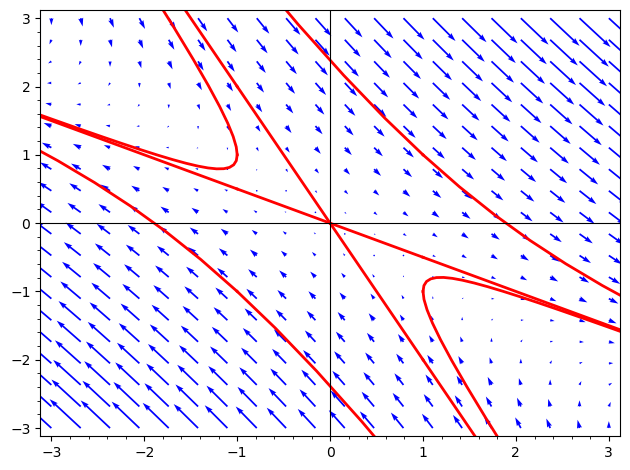

In [12]:
dibujar_sistema(2,2,-2,-3,puntos_iniciales=[(1,-1/2),(1,-2),(-1,1/2),(-1,2),(1,1), (-1,1), (1,-1),(-1,-1)])

In [48]:
u(t,c1,c2) = c1*exp(l1*t)*v1 + c2*exp(l2*t)*v2
u

(t, c1, c2) |--> (c2*e^(-2*t) + c1*e^t, -2*c2*e^(-2*t) - 1/2*c1*e^t)

In [49]:
var('x,y,z')
maxima.eliminate([u(log(z),c1,c2)[0]==x,u(log(z),c1,c2)[1]==y],[z]).sage()

[-(27*c1^2*c2 + 16*x^3 + 48*x^2*y + 36*x*y^2 + 8*y^3)*c1*c2^2]

In [61]:
curvas(x,y,c) = 27*c + 16*x^3 + 48*x^2*y + 36*x*y^2 + 8*y^3
[curvas(x,y,0) for x,y in [(1,-1/2),(1,-2),(-1,1/2),(-1,2),(1,1), (-1,1), (1,-1),(-1,-1)]]

[0, 0, 0, 0, 108, 4, -4, -108]

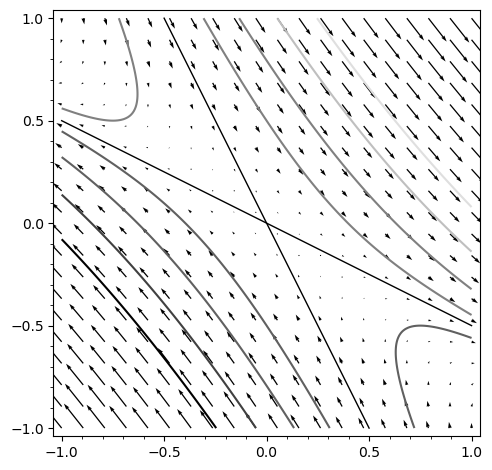

In [79]:
contour_plot(curvas(x,y,0),(x,-1,1),(y,-1,1),fill=false,contours=[-20,-10,-4,-1,1,4,10,20],plot_points=200) +\
plot(-x/2,-1,1,color='black') + plot(-2*x,-1/2,1/2,color='black') + plot_vector_field([2*x+2*y,-2*x-3*y],(x,-1,1),(y,-1,1))